<a href="https://colab.research.google.com/github/nesliyl/datasettrain/blob/main/trainmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import json
import re
import torch

from transformers import BertTokenizer, BertModel

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from difflib import get_close_matches



import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.metrics import f1_score

In [7]:
!pip install optuna

In [ ]:
!pip install fasttext
import fasttext.util
import ast

In [8]:
from xgboost import XGBClassifier

In [9]:
import lightgbm as lgb

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
from sklearn.utils.class_weight import compute_class_weight

In [12]:
from sklearn.metrics import mean_squared_error

In [ ]:
import os
os.environ["HF_HOME"] = "/root/.cache/huggingface"


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install faiss-cpu
import faiss

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 39.6 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [ ]:
!pip install pycountry
import pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.6 MB/s eta 0:00:00


In [ ]:
from urllib.parse import urlparse

In [ ]:
import shutil

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/formodel_dataset.csv"  # Dosyanın tam yolu
df = pd.read_csv(file_path)

print(df.head())

   funding_total_usd country_code           city  funding_rounds  \
0         10000000.0           in         Mumbai               1   
1           700000.0           us  Delaware City               2   
2          3406878.0      unknown        unknown               1   
3          2000000.0           cn        Beijing               1   
4         35000000.0           us      Champaign               1   

  first_funding_at last_funding_at  \
0       2015-01-05      2015-01-05   
1       2014-03-01      2014-10-14   
2       2014-01-30      2014-01-30   
3       2008-03-19      2008-03-19   
4       2014-07-24      2014-07-24   

                                  category_embedding  funding_total_usd_z  \
0  [ 1.27211273e-01  1.71060279e-01 -8.59424993e-...            -0.045030   
1  [-2.50366747e-01 -8.49269554e-02 -1.69406146e-...            -0.097742   
2  [ 8.08092859e-03 -2.04934537e-01 -8.56988057e-...            -0.082400   
3  [-8.19739886e-03 -1.67219535e-01 -1.21706299e-...  

In [ ]:


from sklearn.decomposition import TruncatedSVD


file_path = "/content/drive/My Drive/formodel_dataset.csv"


df = pd.read_csv(file_path)


bert_column = "category_embedding"


X = np.vstack(df[bert_column].apply(lambda x: np.fromstring(x.strip("[]"), sep=" ")))


svd = TruncatedSVD(n_components=10, random_state=42)
X_reduced = svd.fit_transform(X)


df["svd_embedding"] = [" ".join(map(str, row)) for row in X_reduced]


mean_vector = " ".join(map(str, X_reduced.mean(axis=0)))
df.loc["mean"] = df.mean(numeric_only=True)
df.at["mean", "svd_embedding"] = mean_vector

output_file = "svd_reduced.csv"
df.to_csv(output_file, index=False)



print(f"{output_file} dosyası başarıyla oluştu.")


In [ ]:
from google.colab import drive



drive.mount('/content/drive')


save_path = "/content/drive/My Drive/svd_reduced.csv"


df.to_csv(save_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "svd_reduced.csv"



df = pd.read_csv(file_path)

# "category_embedding" sütununu tamamen sil
if "category_embedding" in df.columns:
    df = df.drop(columns=["category_embedding"])


df.to_csv(file_path, index=False)

In [ ]:
file_path = "svd_reduced.csv"

# yeni dosya yolu (category_embedding sütunu silindikten sonra)
new_file_path = "svd_reduced_no_category.csv"


df = pd.read_csv(file_path)


if "category_embedding" in df.columns:
    df = df.drop(columns=["category_embedding"])


df.to_csv(new_file_path, index=False)

In [ ]:



file_path = "svd_reduced_no_category.csv"
df = pd.read_csv(file_path)


closed_df = df[df["status_closed"] == 1].reset_index(drop=True)


num_samples = 20000


new_rows = []


for _ in range(num_samples):
    new_row = {
        col: closed_df[col].sample(n=1, replace=True).values[0]
        for col in closed_df.columns
    }
    new_rows.append(new_row)


new_closed_df = pd.DataFrame(new_rows)


df_augmented = pd.concat([df, new_closed_df], ignore_index=True)


new_file_path = "svd_reduced_augmented.csv"
df_augmented.to_csv(new_file_path, index=False)

print(f"{new_file_path} dosyası başarıyla oluşturuldu ve 20.000 yeni 'closed' verisi eklendi")

In [ ]:
file_path = "svd_reduced_no_category.csv"
augmented_file_path = "svd_reduced_augmented.csv"


df = pd.read_csv(file_path)


try:
    df_augmented = pd.read_csv(augmented_file_path)
except FileNotFoundError:
    df_augmented = df.copy()
acquired_df = df[df["status_acquired"] == 1].reset_index(drop=True)


num_samples = 15000


new_rows = []
for _ in range(num_samples):
    new_row = {
        col: acquired_df[col].sample(n=1, replace=True).values[0]
        for col in acquired_df.columns
    }
    new_rows.append(new_row)


new_acquired_df = pd.DataFrame(new_rows)


df_augmented = pd.concat([df_augmented, new_acquired_df], ignore_index=True)


df_augmented.to_csv(augmented_file_path, index=False)

print(f"{augmented_file_path} dosyasına 15.000 yeni 'acquired' verisi eklendi")

In [ ]:
file_path = "svd_reduced_no_category.csv"
augmented_file_path = "svd_reduced_augmented.csv"


df = pd.read_csv(file_path)


try:
    df_augmented = pd.read_csv(augmented_file_path)
except FileNotFoundError:
    df_augmented = df.copy()
ipo_df = df[df["status_ipo"] == 1].reset_index(drop=True)


num_samples = 15000


new_rows = []
for _ in range(num_samples):
    new_row = {
        col: ipo_df[col].sample(n=1, replace=True).values[0]
    }
    new_rows.append(new_row)


new_ipo_df = pd.DataFrame(new_rows)


df_augmented = pd.concat([df_augmented, new_ipo_df], ignore_index=True)


df_augmented.to_csv(augmented_file_path, index=False)

print(f"{augmented_file_path} dosyasına 15.000 yeni 'acquired' verisi eklendi")

In [ ]:
model_file = "svd_reduced_augmented.csv"
df_model = pd.read_csv(model_file)


columns_to_drop = [
    "funding_total_usd",
    "country_code",
    "city",
    "funding_rounds",
    "first_funding_at",
    "last_funding_at",
    "years_since_first_funding",
    "years_since_last_funding"
]


df_model = df_model.drop(columns=columns_to_drop)


df_model.to_csv("modelfor.csv", index=False)

print("gereksiz sütunlar kaldırıldı ve veri seti güncellendi: formodel_csv.csv")
df=pd.read_csv("modelfor.csv")
df.isnull().sum()

In [ ]:
from google.colab import drive


drive.mount('/content/drive')

save_path = "/content/drive/My Drive/newmodelfor.csv"

df.to_csv(save_path, index=False)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
file_path = "/content/drive/My Drive/newmodelfor.csv"
df = pd.read_csv(file_path)


status_columns = ["status_operating", "status_closed", "status_acquired", "status_ipo"]


class_weights = {}
for col in status_columns:
    class_weights[col] = compute_class_weight(
        class_weight="balanced",
        classes=np.unique(df[col]),
        y=df[col]
    )

for col, weights in class_weights.items():
    print(f"{col} sınıf ağırlıkları: {dict(zip(np.unique(df[col]), weights))}")

In [ ]:
df = pd.read_csv("/content/drive/My Drive/modelfor.csv")


def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)


valid_embeddings = df["svd_embedding"].dropna().values
if len(valid_embeddings) > 0:
    valid_embeddings = np.stack(valid_embeddings)
    mean_embedding = np.mean(valid_embeddings, axis=0)
else:
    mean_embedding = np.zeros(100)

df["svd_embedding"] = df["svd_embedding"].apply(lambda x: mean_embedding if isinstance(x, float) else x)


embedding_dim = len(mean_embedding)
embedding_cols = [f"embed_{i}" for i in range(embedding_dim)]

embedding_df = pd.DataFrame(df["svd_embedding"].tolist(), columns=embedding_cols)
df = df.drop(columns=["svd_embedding"])
df = pd.concat([df, embedding_df], axis=1)


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=np.argmax(y, axis=1))
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=np.argmax(y_temp, axis=1))




unique_classes = np.array([0, 1, 2, 3])
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight("balanced", classes=unique_classes, y=y_train_labels)


class_weights[0] *= 1.20
class_weights[1] *= 1.50
class_weights[2] *= 1.15
class_weights[3] *= 0.90

class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


model = XGBClassifier(
    n_estimators=541,
    objective="multi:softmax",
    num_class=4,
    early_stopping_rounds = 10,
    random_state=42

)



model.fit(
    X_train,
    y_train_labels,
    eval_set=[(X_val, np.argmax(y_val, axis=1))],
    verbose=True,
    sample_weight=np.array([class_weight_dict[i] for i in y_train_labels])
)


results = model.evals_result()
print(results)

print(" Model başarıyla eğitildi! Test Sonuçları:", model.score(X_test, np.argmax(y_test, axis=1)))

y_pred = model.predict(X_test)


accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f" Model Accuracy (Doğruluk): {accuracy:.4f}")

report = classification_report(np.argmax(y_test, axis=1), y_pred, digits=4)
print(" **Classification Report:**")
print(report)


conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(" **Confusion Matrix:**")
print(conf_matrix)


from sklearn.metrics import f1_score
macro_f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average="macro")
print(f" Macro F1-Score: {macro_f1:.4f}")

y_prob = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f" ROC-AUC Score: {roc_auc:.4f}")




feature_importance = model.feature_importances_


feature_names = X.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Önemi büyükten küçüğe sırala ve ilk 10'u seç
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(10)

# Feature Importance Grafiği (Sadece İlk 10 Özellik)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import drive


# Google Drive'ı bağla
drive.mount('/content/drive')

# Kaydedilecek dosya yolu
save_path = "/content/drive/My Drive/modelfor.csv"

# CSV dosyasını Google Drive'a kaydet
df.to_csv(save_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Korelasyon Matrisi:
                                  funding_total_usd_z  status_acquired  \
funding_total_usd_z                          1.000000        -0.008560   
status_acquired                             -0.008560         1.000000   
status_closed                               -0.033499        -0.250024   
status_ipo                                   0.121932        -0.189535   
status_operating                            -0.051033        -0.424211   
country_code_encoded                         0.013780         0.091713   
city_encoded                                -0.011232        -0.030452   
funding_rounds_scaled                        0.057473         0.074731   
years_since_first_funding_scaled             0.024882         0.301715   
years_since_last_funding_scaled             -0.002945         0.263152   

                                  status_closed  status_ipo  status_operating  \
funding_total_usd_z                   -0.033499    0.121932         -0.051033   
sta

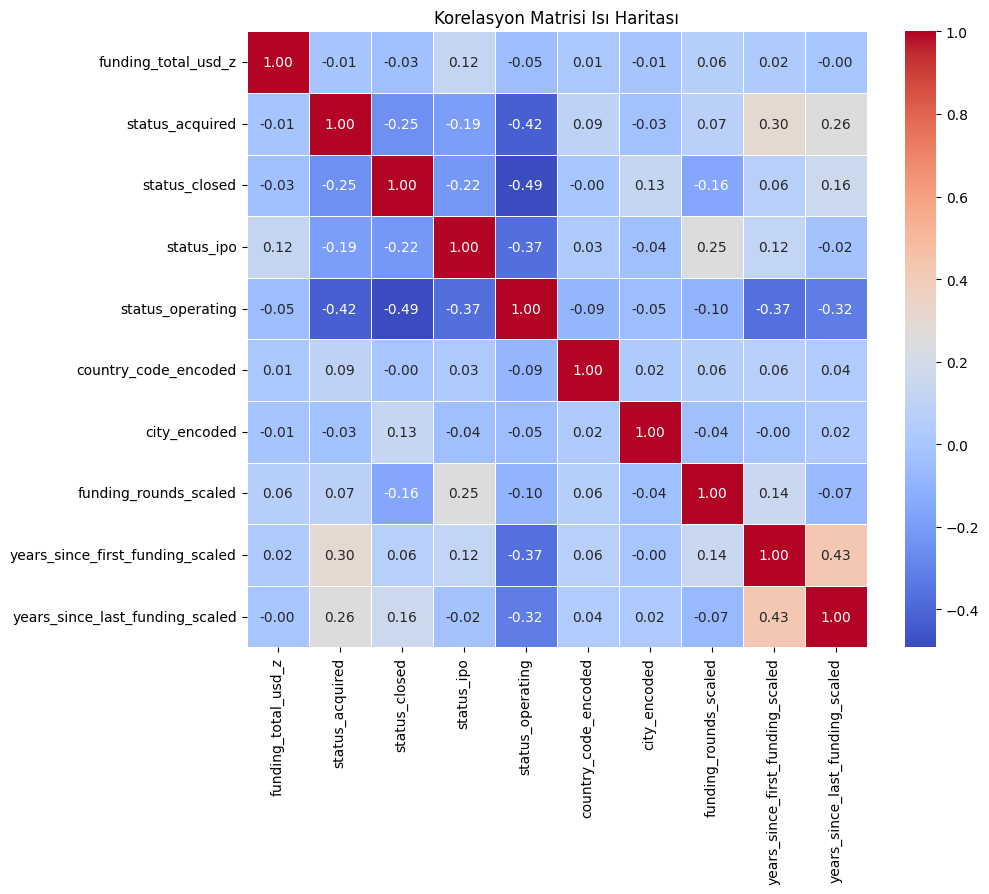

In [ ]:
file_path = "/content/drive/My Drive/modelfor.csv"
df = pd.read_csv(file_path)


columns = [
    "funding_total_usd_z", "status_acquired", "status_closed", "status_ipo", "status_operating",
    "country_code_encoded", "city_encoded", "funding_rounds_scaled",
    "years_since_first_funding_scaled", "years_since_last_funding_scaled"
]


if "svd_embedding" in df.columns:
    df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: np.mean([float(i) for i in x.split()]))
    columns.append("svd_embedding_mean")


corr_matrix = df[columns].corr()


print("Korelasyon Matrisi:")
print(corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()

<ipython-input-32-feaba7cee86c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


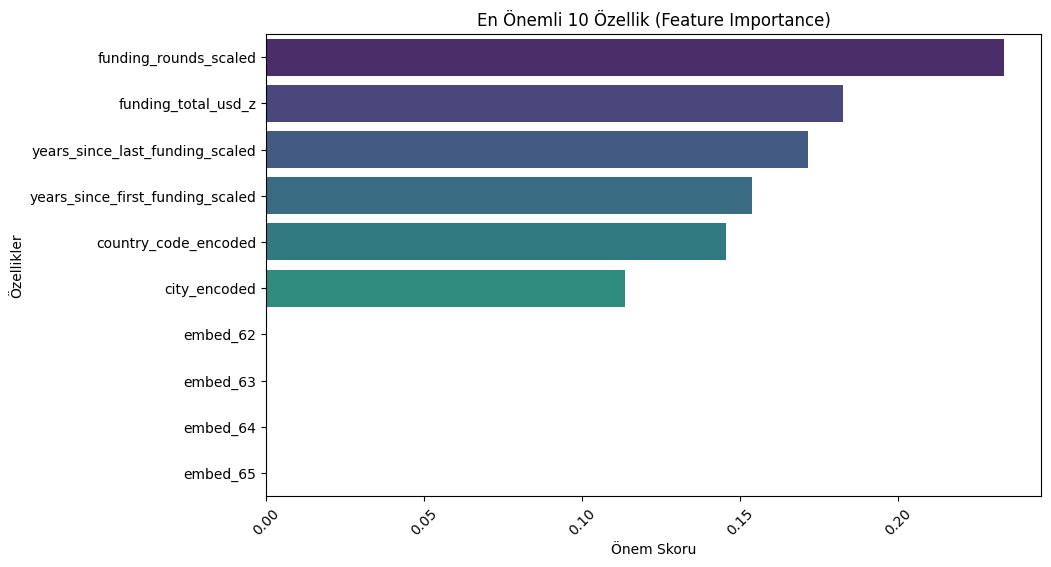

<ipython-input-14-a04212b6ef3d>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))


 Eğitim Seti Boyutu: 81067
 Doğrulama (Validation) Seti Boyutu: 17372
 Test Seti Boyutu: 17372
[0]	validation_0-mlogloss:1.18855
[1]	validation_0-mlogloss:1.06919
[2]	validation_0-mlogloss:0.99136
[3]	validation_0-mlogloss:0.93725
[4]	validation_0-mlogloss:0.90049
[5]	validation_0-mlogloss:0.86974
[6]	validation_0-mlogloss:0.84675
[7]	validation_0-mlogloss:0.82909
[8]	validation_0-mlogloss:0.81613
[9]	validation_0-mlogloss:0.80431
[10]	validation_0-mlogloss:0.79558
[11]	validation_0-mlogloss:0.78401
[12]	validation_0-mlogloss:0.77415
[13]	validation_0-mlogloss:0.76822
[14]	validation_0-mlogloss:0.76168
[15]	validation_0-mlogloss:0.75755
[16]	validation_0-mlogloss:0.75345
[17]	validation_0-mlogloss:0.75109
[18]	validation_0-mlogloss:0.74918
[19]	validation_0-mlogloss:0.74700
[20]	validation_0-mlogloss:0.74418
[21]	validation_0-mlogloss:0.74078
[22]	validation_0-mlogloss:0.73884
[23]	validation_0-mlogloss:0.73550
[24]	validation_0-mlogloss:0.73351
[25]	validation_0-mlogloss:0.73223
[26]	

<ipython-input-14-a04212b6ef3d>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


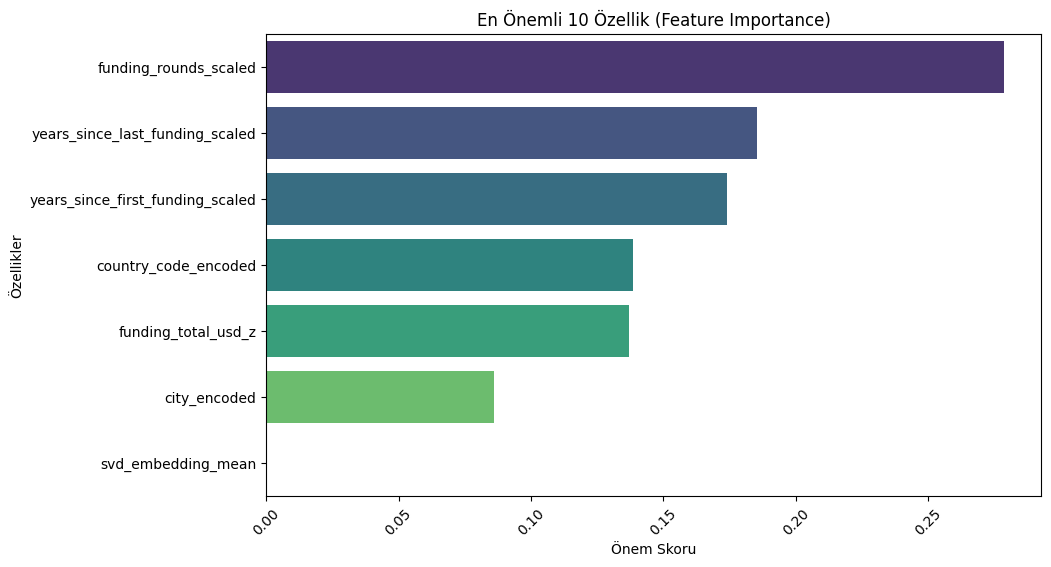

 RMSE: 1.0057


In [14]:
df = pd.read_csv("/content/drive/My Drive/newmodelfor.csv")


def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)


valid_embeddings = df["svd_embedding"].dropna().values
if len(valid_embeddings) > 0:
    valid_embeddings = np.stack(valid_embeddings)
    mean_embedding = np.mean(valid_embeddings, axis=0)
else:
    mean_embedding = np.zeros(1)

df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))


df = df.drop(columns=["svd_embedding"])


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=np.argmax(y, axis=1))
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=np.argmax(y_temp, axis=1))

print(f" Eğitim Seti Boyutu: {len(X_train)}")
print(f" Doğrulama (Validation) Seti Boyutu: {len(X_val)}")
print(f" Test Seti Boyutu: {len(X_test)}")


model = XGBClassifier(
    n_estimators=541,
    objective="multi:softmax",
    num_class=4,
    early_stopping_rounds=10,
    random_state=42
)


model.fit(
    X_train,
    np.argmax(y_train, axis=1),
    eval_set=[(X_val, np.argmax(y_val, axis=1))],
    verbose=True
)


y_pred = model.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Model Accuracy (Doğruluk): {accuracy:.4f}")

report = classification_report(np.argmax(y_test, axis=1), y_pred, digits=4)
print("**Classification Report:**")
print(report)

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("**Confusion Matrix:**")
print(conf_matrix)

macro_f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average="macro")
print(f"Macro F1-Score: {macro_f1:.4f}")

y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f"ROC-AUC Score: {roc_auc:.4f}")


feature_importance = model.feature_importances_


feature_names = X.columns


importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

importance_df = importance_df.sort_values(by="Importance", ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()



y_test_numeric = np.argmax(y_test, axis=1)


y_pred_numeric = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))

print(f" RMSE: {rmse:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 81067, number of used features: 6
[LightGBM] [Wa

<ipython-input-15-bfbc6bc6b156>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


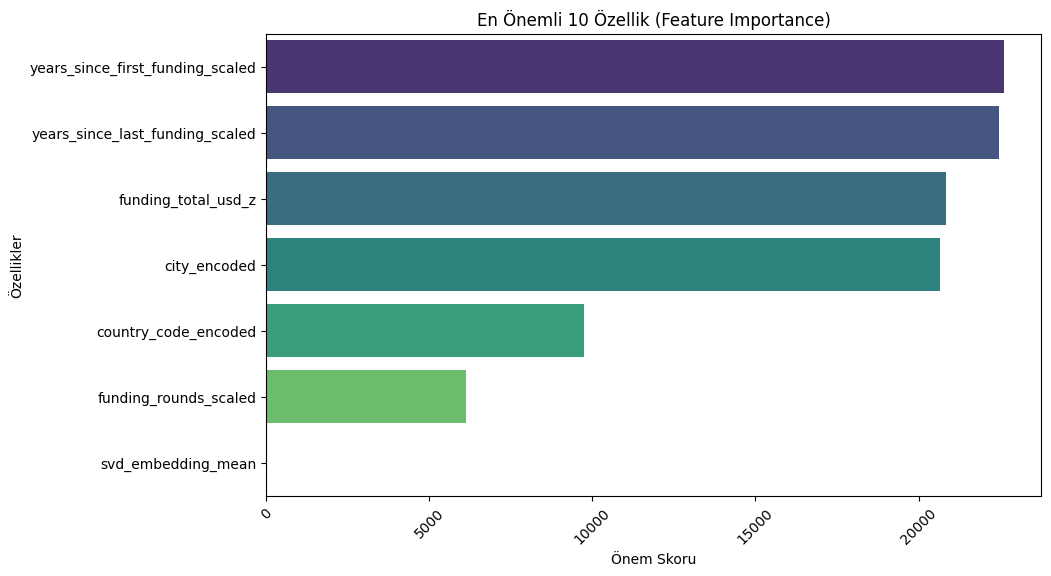

In [15]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, mean_squared_error


df = pd.read_csv("/content/drive/My Drive/newmodelfor.csv")


def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)


valid_embeddings = df["svd_embedding"].dropna().values
if len(valid_embeddings) > 0:
    valid_embeddings = np.stack(valid_embeddings)
    mean_embedding = np.mean(valid_embeddings, axis=0).item()
else:
    mean_embedding = 0.0  # Eğer hiç embedding yoksa sıfır kullan


df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else mean_embedding)


df = df.drop(columns=["svd_embedding"])


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=np.argmax(y, axis=1))
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=np.argmax(y_temp, axis=1))




model = lgb.LGBMClassifier(
    boosting_type="gbdt",
    objective="multiclass",
    num_class=4,
    metric="multi_logloss",
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    n_estimators=1000
)


model.fit(
    X_train, np.argmax(y_train, axis=1),
    eval_set=[(X_val, np.argmax(y_val, axis=1))],
    eval_metric="multi_logloss",
    callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]
)


y_pred = model.predict(X_test)
y_pred_numeric = y_pred

y_test_numeric = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
print(f"model Accuracy (Doğruluk): {accuracy:.4f}")

report = classification_report(y_test_numeric, y_pred_numeric, digits=4)
print("**Classification Report:**")
print(report)

conf_matrix = confusion_matrix(y_test_numeric, y_pred_numeric)
print("**Confusion Matrix:**")
print(conf_matrix)

macro_f1 = f1_score(y_test_numeric, y_pred_numeric, average="macro")
print(f"Macro F1-Score: {macro_f1:.4f}")

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")
print(f"ROC-AUC Score: {roc_auc:.4f}")


rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))
print(f" RMSE: {rmse:.4f}")


feature_importance = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(10)

# Feature Importance Grafiği
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, mean_squared_error


df = pd.read_csv("/content/drive/My Drive/newmodelfor.csv")

def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)
valid_embeddings = df["svd_embedding"].dropna().values
mean_embedding = np.mean(np.stack(valid_embeddings), axis=0) if len(valid_embeddings) > 0 else np.zeros(1)
df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))
df = df.drop(columns=["svd_embedding"])


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=np.argmax(y, axis=1))
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=np.argmax(y_temp, axis=1))


param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=4, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, np.argmax(y_train, axis=1))

print(f"en İyi Hiperparametreler: {grid_search.best_params_}")
print(f"en İyi Validation Doğruluk Skoru: {grid_search.best_score_:.4f}")


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
macro_f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average="macro")
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class="ovr")

print(f"📌 Yeni Model Accuracy: {accuracy:.4f}")
print(f"📌 Yeni Model Macro F1-Score: {macro_f1:.4f}")
print(f"📌 Yeni Model ROC-AUC Score: {roc_auc:.4f}")


feature_importance = best_model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()


y_test_numeric = np.argmax(y_test, axis=1)
y_pred_numeric = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))

print(f"📌 RMSE: {rmse:.4f}")


<ipython-input-38-bb81fde2e8aa>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))


✅ Eğitim Seti: 81067 - ✅ Validation Seti: 17372 - ✅ Test Seti: 17372
Fitting 3 folds for each of 729 candidates, totalling 2187 fits


KeyboardInterrupt: 

[I 2025-02-17 18:50:14,140] A new study created in memory with name: no-name-c7b3adea-caf8-4baa-8366-7844af35337f
[I 2025-02-17 18:50:23,885] Trial 0 finished with value: 0.718454985033387 and parameters: {'n_estimators': 668, 'max_depth': 6, 'learning_rate': 0.14786454605182334, 'min_child_weight': 4, 'subsample': 0.9665761163685088, 'colsample_bytree': 0.942489682474561, 'gamma': 2.4259971512569227, 'reg_alpha': 0.9726566485349573}. Best is trial 0 with value: 0.718454985033387.
[I 2025-02-17 18:50:33,210] Trial 1 finished with value: 0.6863918950034539 and parameters: {'n_estimators': 513, 'max_depth': 3, 'learning_rate': 0.18768372194433838, 'min_child_weight': 5, 'subsample': 0.8364142573757154, 'colsample_bytree': 0.673139464564962, 'gamma': 4.140186992126569, 'reg_alpha': 0.8359308312808039}. Best is trial 0 with value: 0.718454985033387.
[I 2025-02-17 18:50:51,477] Trial 2 finished with value: 0.7052152889707576 and parameters: {'n_estimators': 839, 'max_depth': 4, 'learning_ra

en İyi Hiperparametreler: {'n_estimators': 905, 'max_depth': 7, 'learning_rate': 0.10093494673796961, 'min_child_weight': 10, 'subsample': 0.5149106493108047, 'colsample_bytree': 0.836062835773024, 'gamma': 0.13949854047904942, 'reg_alpha': 0.9161548423882566}
[0]	validation_0-mlogloss:1.33399
[1]	validation_0-mlogloss:1.28971
[2]	validation_0-mlogloss:1.24798
[3]	validation_0-mlogloss:1.21240
[4]	validation_0-mlogloss:1.17725
[5]	validation_0-mlogloss:1.14955
[6]	validation_0-mlogloss:1.12239
[7]	validation_0-mlogloss:1.09782
[8]	validation_0-mlogloss:1.07480
[9]	validation_0-mlogloss:1.05375
[10]	validation_0-mlogloss:1.02726
[11]	validation_0-mlogloss:1.01164
[12]	validation_0-mlogloss:0.99722
[13]	validation_0-mlogloss:0.98273
[14]	validation_0-mlogloss:0.96431
[15]	validation_0-mlogloss:0.95335
[16]	validation_0-mlogloss:0.94272
[17]	validation_0-mlogloss:0.92830
[18]	validation_0-mlogloss:0.91610
[19]	validation_0-mlogloss:0.90304
[20]	validation_0-mlogloss:0.89336
[21]	validatio

<ipython-input-17-3708fd78accb>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


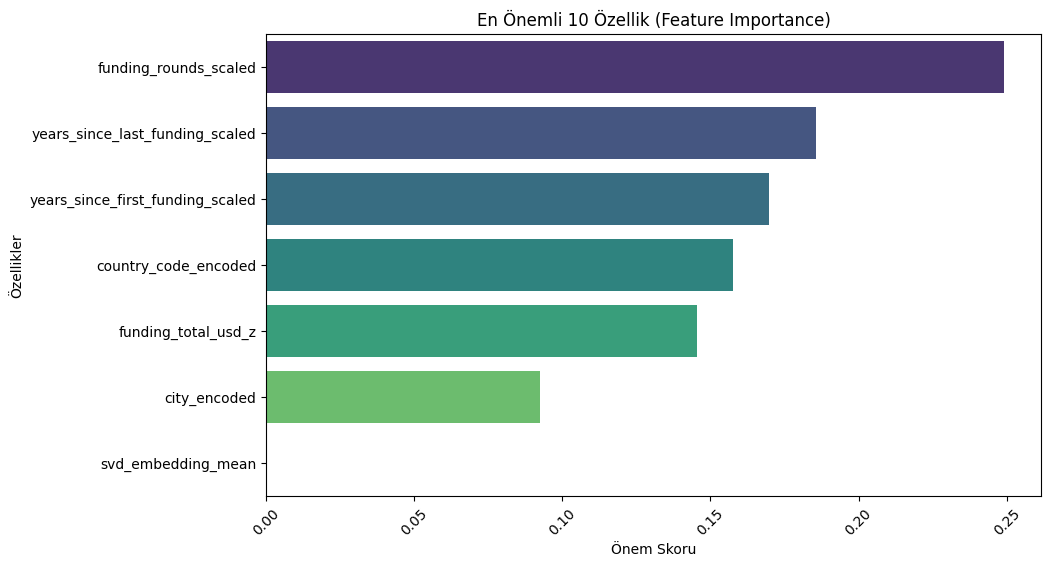

RMSE: 1.0105


In [17]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error


df = pd.read_csv("/content/drive/My Drive/newmodelfor.csv")


def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)


valid_embeddings = df["svd_embedding"].dropna().values
if len(valid_embeddings) > 0:
    valid_embeddings = np.stack(valid_embeddings)
    mean_embedding = np.mean(valid_embeddings, axis=0)
else:
    mean_embedding = np.zeros(1)

df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: np.mean(x).item() if isinstance(x, np.ndarray) else float(mean_embedding.item()))
df = df.drop(columns=["svd_embedding"])


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = np.argmax(df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values, axis=1)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# optuna ile hiperparametre opt.
def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "objective": "multi:softmax",
        "num_class": 4,
        "eval_metric": "mlogloss",
        "n_jobs": -1,
        "random_state": 42,
        "early_stopping_rounds": 10
    }


    model = xgb.XGBClassifier(**params)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )


    y_pred = model.predict(X_val)

    return accuracy_score(y_val, y_pred)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)


print("en İyi Hiperparametreler:", study.best_params)


best_params = study.best_params
best_params["objective"] = "multi:softmax"
best_params["num_class"] = 4
best_params["eval_metric"] = "mlogloss"
best_params["n_jobs"] = -1
best_params["early_stopping_rounds"] = 10

xgb_model = xgb.XGBClassifier(**best_params)


xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# tahmin
y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(pd.get_dummies(y_test), xgb_model.predict_proba(X_test), multi_class="ovr")

print(f"Yeni Model Accuracy: {accuracy:.4f}")
print(f"Yeni Model Macro F1-Score: {macro_f1:.4f}")
print(f"Yeni Model ROC-AUC Score: {roc_auc:.4f}")


feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")


[I 2025-02-17 19:01:30,452] A new study created in memory with name: no-name-6696f80d-0d7f-4a10-baf6-7b6a31b6071e
[I 2025-02-17 19:02:43,396] Trial 0 finished with value: 0.7357817177066543 and parameters: {'n_estimators': 1049, 'max_depth': 7, 'learning_rate': 0.028917695214017148, 'min_child_weight': 2, 'subsample': 0.9735433604262368, 'colsample_bytree': 0.9606515430897858, 'gamma': 0.09045217160618624, 'reg_alpha': 0.5816176394191187}. Best is trial 0 with value: 0.7357817177066543.
[I 2025-02-17 19:03:40,447] Trial 1 finished with value: 0.7270895694220585 and parameters: {'n_estimators': 1182, 'max_depth': 12, 'learning_rate': 0.016052587514800366, 'min_child_weight': 8, 'subsample': 0.9270612394325453, 'colsample_bytree': 0.753455969405979, 'gamma': 2.2049545321820494, 'reg_alpha': 0.3129808551440665}. Best is trial 0 with value: 0.7357817177066543.
[I 2025-02-17 19:04:32,100] Trial 2 finished with value: 0.7320400644715634 and parameters: {'n_estimators': 880, 'max_depth': 10, 

En İyi Hiperparametreler: {'n_estimators': 1027, 'max_depth': 7, 'learning_rate': 0.06126600348260268, 'min_child_weight': 9, 'subsample': 0.943572979079715, 'colsample_bytree': 0.6790978495590464, 'gamma': 0.016899570074411632, 'reg_alpha': 0.8940188363229143}
[0]	validation_0-mlogloss:1.35901
[1]	validation_0-mlogloss:1.33180
[2]	validation_0-mlogloss:1.30642
[3]	validation_0-mlogloss:1.28418
[4]	validation_0-mlogloss:1.26123
[5]	validation_0-mlogloss:1.23964
[6]	validation_0-mlogloss:1.22207
[7]	validation_0-mlogloss:1.20865
[8]	validation_0-mlogloss:1.19014
[9]	validation_0-mlogloss:1.17170
[10]	validation_0-mlogloss:1.15464
[11]	validation_0-mlogloss:1.14153
[12]	validation_0-mlogloss:1.12756
[13]	validation_0-mlogloss:1.11303
[14]	validation_0-mlogloss:1.09450
[15]	validation_0-mlogloss:1.08252
[16]	validation_0-mlogloss:1.07185
[17]	validation_0-mlogloss:1.05709
[18]	validation_0-mlogloss:1.04182
[19]	validation_0-mlogloss:1.02628
[20]	validation_0-mlogloss:1.01550
[21]	validati

<ipython-input-18-44aa2f628867>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


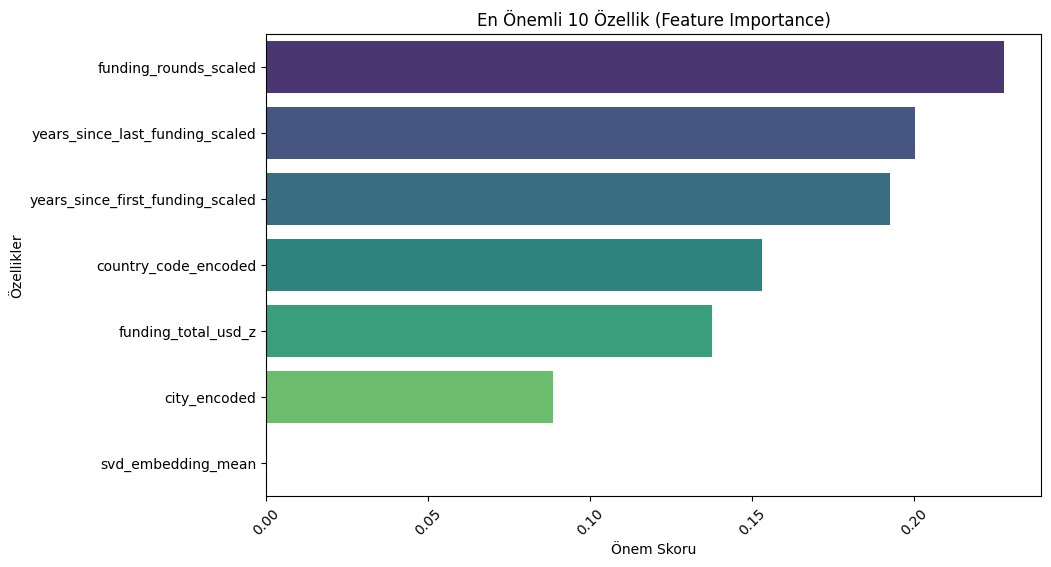

 RMSE: 1.0055


In [18]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error


df = pd.read_csv("/content/drive/My Drive/newmodelfor.csv")


def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)


valid_embeddings = df["svd_embedding"].dropna().values
if len(valid_embeddings) > 0:
    valid_embeddings = np.stack(valid_embeddings)
    mean_embedding = np.mean(valid_embeddings, axis=0)
else:
    mean_embedding = np.zeros(1)

df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: np.mean(x).item() if isinstance(x, np.ndarray) else float(mean_embedding.item()))
df = df.drop(columns=["svd_embedding"])


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = np.argmax(df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values, axis=1)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)


def objective(trial):
    # Optuna
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 1200),
        "max_depth": trial.suggest_int("max_depth", 7, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "objective": "multi:softmax",
        "num_class": 4,
        "eval_metric": "mlogloss",
        "n_jobs": -1,
        "random_state": 42,
        "early_stopping_rounds": 15
    }


    model = xgb.XGBClassifier(**params)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )


    y_pred = model.predict(X_val)


    return accuracy_score(y_val, y_pred)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # 45 farklı kombinasyon deniyoruz


print("En İyi Hiperparametreler:", study.best_params)


best_params = study.best_params
best_params["objective"] = "multi:softmax"
best_params["num_class"] = 4
best_params["eval_metric"] = "mlogloss"
best_params["n_jobs"] = -1
best_params["early_stopping_rounds"] = 15  # final model için de ekledik

xgb_model = xgb.XGBClassifier(**best_params)


xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)


y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(pd.get_dummies(y_test), xgb_model.predict_proba(X_test), multi_class="ovr")

print(f" Yeni Model Accuracy: {accuracy:.4f}")
print(f" Yeni Model Macro F1-Score: {macro_f1:.4f}")
print(f" Yeni Model ROC-AUC Score: {roc_auc:.4f}")


feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f" RMSE: {rmse:.4f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


<ipython-input-20-38f434d49875>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))


 En İyi Hiperparametreler: {'subsample': 0.98, 'reg_alpha': 0.93, 'n_estimators': 1100, 'min_child_weight': 8, 'max_depth': 6, 'learning_rate': 0.08, 'gamma': 0.015, 'colsample_bytree': 0.71}
Yeni Model Accuracy: 0.7385
Yeni Model Macro F1-Score: 0.6832
Yeni Model ROC-AUC Score: 0.9058


<ipython-input-20-38f434d49875>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


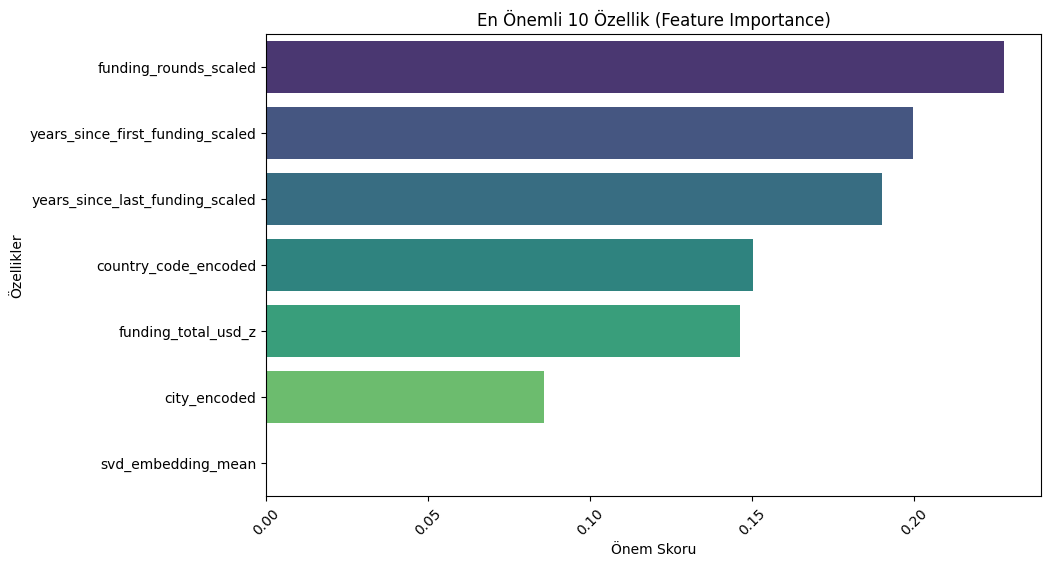

RMSE: 1.0024


In [20]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error


df = pd.read_csv("/content/drive/My Drive/newmodelfor.csv")


def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)
valid_embeddings = df["svd_embedding"].dropna().values
mean_embedding = np.mean(np.stack(valid_embeddings), axis=0) if len(valid_embeddings) > 0 else np.zeros(1)
df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))
df = df.drop(columns=["svd_embedding"])


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = np.argmax(df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values, axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)


param_grid = {
    "n_estimators": [900, 1000, 1100, 1200],
    "max_depth": [6, 7, 8],
    "learning_rate": [0.05, 0.06, 0.07, 0.08],
    "min_child_weight": [8, 9, 10, 11],
    "subsample": [0.9, 0.94, 0.98],
    "colsample_bytree": [0.65, 0.68, 0.71],
    "gamma": [0.01, 0.015, 0.02],
    "reg_alpha": [0.85, 0.89, 0.93]
}

xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    random_state=42
)


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=5,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print(f" En İyi Hiperparametreler: {best_params}")


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(pd.get_dummies(y_test), best_model.predict_proba(X_test), multi_class="ovr")

print(f"Yeni Model Accuracy: {accuracy:.4f}")
print(f"Yeni Model Macro F1-Score: {macro_f1:.4f}")
print(f"Yeni Model ROC-AUC Score: {roc_auc:.4f}")


feature_importance = best_model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")


<ipython-input-21-efff6af8ed49>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))


[0]	validation_0-mlogloss:1.34587
[1]	validation_0-mlogloss:1.32021
[2]	validation_0-mlogloss:1.29356
[3]	validation_0-mlogloss:1.27136
[4]	validation_0-mlogloss:1.24154
[5]	validation_0-mlogloss:1.22213
[6]	validation_0-mlogloss:1.20542
[7]	validation_0-mlogloss:1.18699
[8]	validation_0-mlogloss:1.17217
[9]	validation_0-mlogloss:1.15119
[10]	validation_0-mlogloss:1.13808
[11]	validation_0-mlogloss:1.12552
[12]	validation_0-mlogloss:1.11106
[13]	validation_0-mlogloss:1.09639
[14]	validation_0-mlogloss:1.08326
[15]	validation_0-mlogloss:1.07140
[16]	validation_0-mlogloss:1.06112
[17]	validation_0-mlogloss:1.05332
[18]	validation_0-mlogloss:1.04396
[19]	validation_0-mlogloss:1.03405
[20]	validation_0-mlogloss:1.02393
[21]	validation_0-mlogloss:1.01499
[22]	validation_0-mlogloss:1.00779
[23]	validation_0-mlogloss:1.00112
[24]	validation_0-mlogloss:0.98930
[25]	validation_0-mlogloss:0.98190
[26]	validation_0-mlogloss:0.97077
[27]	validation_0-mlogloss:0.96284
[28]	validation_0-mlogloss:0.9

<ipython-input-21-efff6af8ed49>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


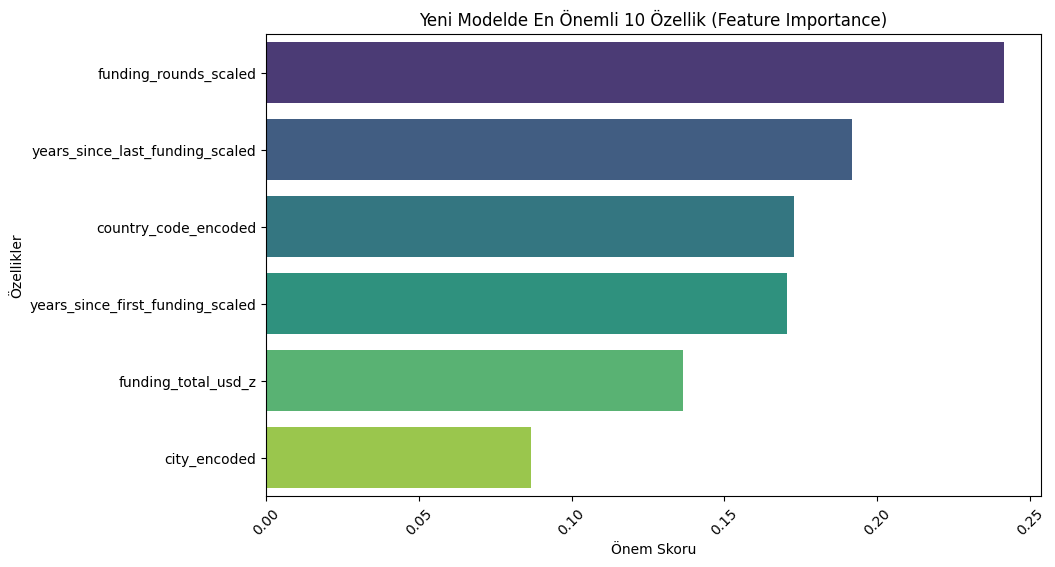

Yeni Model RMSE: 1.0005


In [21]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, classification_report, confusion_matrix


df = pd.read_csv("/content/drive/My Drive/newmodelfor.csv")


def convert_embedding(x):
    try:
        return np.array(ast.literal_eval(x), dtype=np.float32)
    except:
        return np.nan

df["svd_embedding"] = df["svd_embedding"].astype(str).apply(convert_embedding)
valid_embeddings = df["svd_embedding"].dropna().values
mean_embedding = np.mean(np.stack(valid_embeddings), axis=0) if len(valid_embeddings) > 0 else np.zeros(1)
df["svd_embedding_mean"] = df["svd_embedding"].apply(lambda x: float(np.mean(x)) if isinstance(x, np.ndarray) else float(mean_embedding))
df = df.drop(columns=["svd_embedding"])


X = df.drop(columns=["status_acquired", "status_closed", "status_ipo", "status_operating"])
y = np.argmax(df[["status_acquired", "status_closed", "status_ipo", "status_operating"]].values, axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)


model = xgb.XGBClassifier(
    n_estimators=1027,
    max_depth=7,
    learning_rate=0.06126600348260268,
    min_child_weight=9,
    subsample=0.943572979079715,
    colsample_bytree=0.6790978495590464,
    gamma=0.016899570074411632,
    reg_alpha=0.8940188363229143,
    objective="multi:softmax",
    num_class=4,
    random_state=42
)


model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
feature_importance = model.feature_importances_


importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

threshold = 0.005  # Eğer önem skoru 0.005'ten düşükse çıkar
selected_features = importance_df[importance_df["Importance"] > threshold]["Feature"].tolist()

print(f"Kullanılacak Özellikler ({len(selected_features)} adet): {selected_features}")


X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train, eval_set=[(X_test_selected, y_test)], verbose=True)
y_pred = model.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average="macro")
roc_auc = roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test_selected), multi_class="ovr")

print(f"Yeni Model Accuracy: {accuracy:.4f}")
print(f" Yeni Model Macro F1-Score: {macro_f1:.4f}")
print(f" Yeni Model ROC-AUC Score: {roc_auc:.4f}")

feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": selected_features, "Importance": feature_importance}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Yeni Modelde En Önemli 10 Özellik (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.xticks(rotation=45)
plt.show()


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Yeni Model RMSE: {rmse:.4f}")
